In [1]:
# Import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Data Import
The data for this exercise has already been downloaded and unzipped from [Medicare.gov](https://data.medicare.gov/data/hospital-compare). To be able to read the csv files properly the encoding="ISO-8859-1" was needed. I start by reading in the 'HCAHPS-Hospital.cvs' that includes the summary star ratings for the Medicare hospitals.


In [2]:
# Load 'HCAHPS - Hospital.csv' which contains the summary star ratings
d = os.path.dirname(os.getcwd())
data_file = os.path.join(d, 'data','raw','HCAHPS - Hospital.csv')
survey_df = pd.read_csv(data_file, encoding = "ISO-8859-1")


In [3]:
# Get some general information about the dataframe
print(len(survey_df.columns))
print(survey_df.info())

22
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264660 entries, 0 to 264659
Data columns (total 22 columns):
Provider ID                              264660 non-null int64
Hospital Name                            264660 non-null object
Address                                  264660 non-null object
City                                     264660 non-null object
State                                    264660 non-null object
ZIP Code                                 264660 non-null int64
County Name                              263835 non-null object
Phone Number                             264660 non-null int64
HCAHPS Measure ID                        264660 non-null object
HCAHPS Question                          264660 non-null object
HCAHPS Answer Description                264660 non-null object
Patient Survey Star Rating               264660 non-null object
Patient Survey Star Rating Footnote      15864 non-null object
HCAHPS Answer Percent                    264660 non-null o

In [4]:
# Start cleaning
# Select relevant columns
survey_df_clean = survey_df[['Provider ID','Hospital Name','City', 'State', 'ZIP Code', 'HCAHPS Answer Description','Patient Survey Star Rating']]
print(survey_df_clean.head())

   Provider ID                     Hospital Name    City State  ZIP Code  \
0        10001  SOUTHEAST ALABAMA MEDICAL CENTER  DOTHAN    AL     36301   
1        10001  SOUTHEAST ALABAMA MEDICAL CENTER  DOTHAN    AL     36301   
2        10001  SOUTHEAST ALABAMA MEDICAL CENTER  DOTHAN    AL     36301   
3        10001  SOUTHEAST ALABAMA MEDICAL CENTER  DOTHAN    AL     36301   
4        10001  SOUTHEAST ALABAMA MEDICAL CENTER  DOTHAN    AL     36301   

               HCAHPS Answer Description Patient Survey Star Rating  
0                    Summary star rating                          3  
1                Room was "always" clean             Not Applicable  
2  Room was "sometimes" or "never" clean             Not Applicable  
3               Room was "usually" clean             Not Applicable  
4        Cleanliness - linear mean score             Not Applicable  


In [5]:
# Select only rows that contain summary start ratings
survey_df_clean = survey_df_clean[survey_df_clean['HCAHPS Answer Description'] == 'Summary star rating']
print(survey_df_clean.head())
print(survey_df_clean.info())

     Provider ID                     Hospital Name      City State  ZIP Code  \
0          10001  SOUTHEAST ALABAMA MEDICAL CENTER    DOTHAN    AL     36301   
55         10005     MARSHALL MEDICAL CENTER SOUTH      BOAZ    AL     35957   
110        10006    ELIZA COFFEE MEMORIAL HOSPITAL  FLORENCE    AL     35631   
165        10007          MIZELL MEMORIAL HOSPITAL       OPP    AL     36467   
220        10008       CRENSHAW COMMUNITY HOSPITAL   LUVERNE    AL     36049   

    HCAHPS Answer Description Patient Survey Star Rating  
0         Summary star rating                          3  
55        Summary star rating                          4  
110       Summary star rating                          3  
165       Summary star rating                          4  
220       Summary star rating              Not Available  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4812 entries, 0 to 264605
Data columns (total 7 columns):
Provider ID                   4812 non-null int64
Hospita

In [6]:
# Delete column 'HCAHPS Answer Description' 
survey_df_clean.drop('HCAHPS Answer Description', axis=1, inplace=True)
print(survey_df_clean.head())

     Provider ID                     Hospital Name      City State  ZIP Code  \
0          10001  SOUTHEAST ALABAMA MEDICAL CENTER    DOTHAN    AL     36301   
55         10005     MARSHALL MEDICAL CENTER SOUTH      BOAZ    AL     35957   
110        10006    ELIZA COFFEE MEMORIAL HOSPITAL  FLORENCE    AL     35631   
165        10007          MIZELL MEMORIAL HOSPITAL       OPP    AL     36467   
220        10008       CRENSHAW COMMUNITY HOSPITAL   LUVERNE    AL     36049   

    Patient Survey Star Rating  
0                            3  
55                           4  
110                          3  
165                          4  
220              Not Available  


In [7]:
# Rename the column 'Patient Survey Star Rating' to 'Summary star rating'
survey_df_clean.rename(columns = {'Patient Survey Star Rating':'Summary star rating'}, inplace=True)
print(survey_df_clean.head())
survey_df_clean

     Provider ID                     Hospital Name      City State  ZIP Code  \
0          10001  SOUTHEAST ALABAMA MEDICAL CENTER    DOTHAN    AL     36301   
55         10005     MARSHALL MEDICAL CENTER SOUTH      BOAZ    AL     35957   
110        10006    ELIZA COFFEE MEMORIAL HOSPITAL  FLORENCE    AL     35631   
165        10007          MIZELL MEMORIAL HOSPITAL       OPP    AL     36467   
220        10008       CRENSHAW COMMUNITY HOSPITAL   LUVERNE    AL     36049   

    Summary star rating  
0                     3  
55                    4  
110                   3  
165                   4  
220       Not Available  


,Provider ID,Hospital Name,City,State,ZIP Code,Summary star rating
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,AL,36301,3
55,10005,MARSHALL MEDICAL CENTER SOUTH,BOAZ,AL,35957,4
110,10006,ELIZA COFFEE MEMORIAL HOSPITAL,FLORENCE,AL,35631,3
165,10007,MIZELL MEMORIAL HOSPITAL,OPP,AL,36467,4
220,10008,CRENSHAW COMMUNITY HOSPITAL,LUVERNE,AL,36049,Not Available
275,10011,ST VINCENT'S EAST,BIRMINGHAM,AL,35235,3
330,10012,DEKALB REGIONAL MEDICAL CENTER,FORT PAYNE,AL,35968,3
385,10016,SHELBY BAPTIST MEDICAL CENTER,ALABASTER,AL,35007,3
440,10018,CALLAHAN EYE HOSPITAL,BIRMINGHAM,AL,35233,Not Available
495,10019,HELEN KELLER MEMORIAL HOSPITAL,SHEFFIELD,AL,35660,3


3                1380
4                1335
Not Available    1322
2                 525
5                 195
1                  55
Name: Summary star rating, dtype: int64


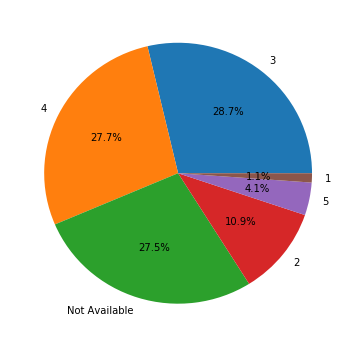

In [8]:
# Make a piechart to get a feel on the distribution of ratings
print(survey_df_clean['Summary star rating'].value_counts())
survey_df_clean['Summary star rating'].value_counts().plot.pie(figsize=(6, 6),autopct="%1.1f%%")
plt.ylabel('')
plt.show()

In [9]:
# Examine the Not Available values -> We notice that the unreported ratings are due to insufficient number of surveys
survey_df_less = survey_df[survey_df['HCAHPS Answer Description'] == 'Summary star rating']
survey_df_less = survey_df_less[survey_df_less['Patient Survey Star Rating'] == 'Not Available']
print(len(survey_df_less['Patient Survey Star Rating Footnote']=='15 - The number of cases/patients is too few to report a star rating.'))

1322


3    1380
4    1335
2     525
5     195
1      55
Name: Summary star rating, dtype: int64


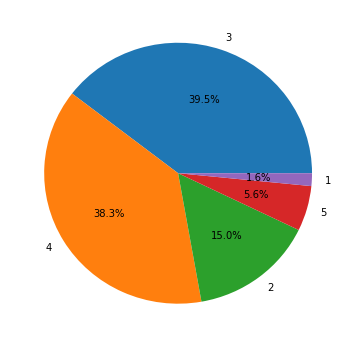

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3490 entries, 0 to 264110
Data columns (total 6 columns):
Provider ID            3490 non-null int64
Hospital Name          3490 non-null object
City                   3490 non-null object
State                  3490 non-null object
ZIP Code               3490 non-null int64
Summary star rating    3490 non-null object
dtypes: int64(2), object(4)
memory usage: 190.9+ KB
None


In [10]:
# Drop the hospitals with no ratings available
survey_df_clean.drop(survey_df_clean[survey_df_clean['Summary star rating']=='Not Available'].index, inplace=True)
print(survey_df_clean['Summary star rating'].value_counts())
survey_df_clean['Summary star rating'].value_counts().plot.pie(figsize=(6, 6),autopct="%1.1f%%")
plt.ylabel('')
plt.show()
print(survey_df_clean.info())

In [11]:
# Make sure the ID's are unique
survey_df_clean['Provider ID'].drop_duplicates()

0          10001
55         10005
110        10006
165        10007
275        10011
330        10012
385        10016
495        10019
550        10021
605        10022
660        10023
715        10024
770        10029
880        10033
935        10034
990        10035
1045       10036
1100       10038
1155       10039
1210       10040
1265       10044
1320       10045
1375       10046
1430       10047
1485       10049
1595       10052
1650       10055
1705       10056
1815       10059
1870       10061
           ...  
261635    670044
261800    670047
261855    670049
261910    670053
261965    670054
262020    670055
262075    670056
262185    670059
262240    670060
262295    670061
262405    670067
262460    670068
262515    670069
262570    670071
262680    670073
262735    670075
262790    670076
262845    670077
262900    670078
262955    670080
263010    670082
263120    670085
263230    670088
263340    670092
263560    670096
263670    670098
263835    670103
263890    6701

In [12]:
# Move Summary star rating column and ZIP Code to after the Hospital Name
cols = survey_df_clean.columns.tolist()
cols.insert(2, cols.pop(cols.index('Summary star rating')))
cols.insert(3, cols.pop(cols.index('ZIP Code')))
survey_df_clean = survey_df_clean.reindex(columns=cols)
print(survey_df_clean.head())

     Provider ID                     Hospital Name Summary star rating  \
0          10001  SOUTHEAST ALABAMA MEDICAL CENTER                   3   
55         10005     MARSHALL MEDICAL CENTER SOUTH                   4   
110        10006    ELIZA COFFEE MEMORIAL HOSPITAL                   3   
165        10007          MIZELL MEMORIAL HOSPITAL                   4   
275        10011                 ST VINCENT'S EAST                   3   

     ZIP Code        City State  
0       36301      DOTHAN    AL  
55      35957        BOAZ    AL  
110     35631    FLORENCE    AL  
165     36467         OPP    AL  
275     35235  BIRMINGHAM    AL  


# Other used csv files
In the next steps, I will read in other csv files that contain measures for each of the hospital. Tables that I used to extract additional measure columns are:
1. Hospital General Information.csv
2. Complications and Deaths- Hospital.csv  
3. Healthcare associated infections- Hospital.csv 
4. Hospital Returns - Hospital.csv
5. Medicare Hospital Spending by Claim.csv 
6. Outpatient Imaging Efficiency- Hopital.csv
7. Structural Measures- Hospital.csv
8. Timely and Effective Care-Hospitals.csv


In [13]:
# Load 'Hospital General information.csv'
data_file2 = os.path.join(d, 'data','raw','Hospital General Information.csv')
print(data_file2)
general_df = pd.read_csv(data_file2, encoding = "ISO-8859-1")
print(general_df.head())

C:\Research\Projects\Internal_Selfstudy\DSCT\Capstone project 1\hospital-surveys\data\raw\Hospital General Information.csv
   Provider ID                     Hospital Name                     Address  \
0        10001  SOUTHEAST ALABAMA MEDICAL CENTER      1108 ROSS CLARK CIRCLE   
1        10005     MARSHALL MEDICAL CENTER SOUTH  2505 U S HIGHWAY 431 NORTH   
2        10006    ELIZA COFFEE MEMORIAL HOSPITAL          205 MARENGO STREET   
3        10007          MIZELL MEMORIAL HOSPITAL               702 N MAIN ST   
4        10008       CRENSHAW COMMUNITY HOSPITAL         101 HOSPITAL CIRCLE   

       City State  ZIP Code County Name  Phone Number         Hospital Type  \
0    DOTHAN    AL     36301     HOUSTON    3347938701  Acute Care Hospitals   
1      BOAZ    AL     35957    MARSHALL    2565938310  Acute Care Hospitals   
2  FLORENCE    AL     35631  LAUDERDALE    2567688400  Acute Care Hospitals   
3       OPP    AL     36467   COVINGTON    3344933541  Acute Care Hospitals   
4

In [14]:
# Get some general information about the dataframe
print(len(general_df.columns))
print(general_df.info())

28
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 28 columns):
Provider ID                                                      4812 non-null int64
Hospital Name                                                    4812 non-null object
Address                                                          4812 non-null object
City                                                             4812 non-null object
State                                                            4812 non-null object
ZIP Code                                                         4812 non-null int64
County Name                                                      4797 non-null object
Phone Number                                                     4812 non-null int64
Hospital Type                                                    4812 non-null object
Hospital Ownership                                               4812 non-null object
Emergency Services               

In [15]:
# select columns from the hospital general dataframe
general_df_less = general_df[['Provider ID','Hospital Type', 'Hospital Ownership',
                             'Emergency Services','Meets criteria for meaningful use of EHRs',
                             'Mortality national comparison', 'Safety of care national comparison',
                             'Readmission national comparison','Effectiveness of care national comparison',
                             'Timeliness of care national comparison','Efficient use of medical imaging national comparison']]
print(general_df_less.head())
# This is by default an inner join
survey_df_clean = pd.merge(survey_df_clean, general_df_less, on = 'Provider ID')
print(survey_df_clean.info())

   Provider ID         Hospital Type  \
0        10001  Acute Care Hospitals   
1        10005  Acute Care Hospitals   
2        10006  Acute Care Hospitals   
3        10007  Acute Care Hospitals   
4        10008  Acute Care Hospitals   

                            Hospital Ownership Emergency Services  \
0  Government - Hospital District or Authority                Yes   
1  Government - Hospital District or Authority                Yes   
2  Government - Hospital District or Authority                Yes   
3               Voluntary non-profit - Private                Yes   
4                                  Proprietary                Yes   

  Meets criteria for meaningful use of EHRs Mortality national comparison  \
0                                         Y  Same as the national average   
1                                         Y    Below the national average   
2                                         Y    Below the national average   
3                                   

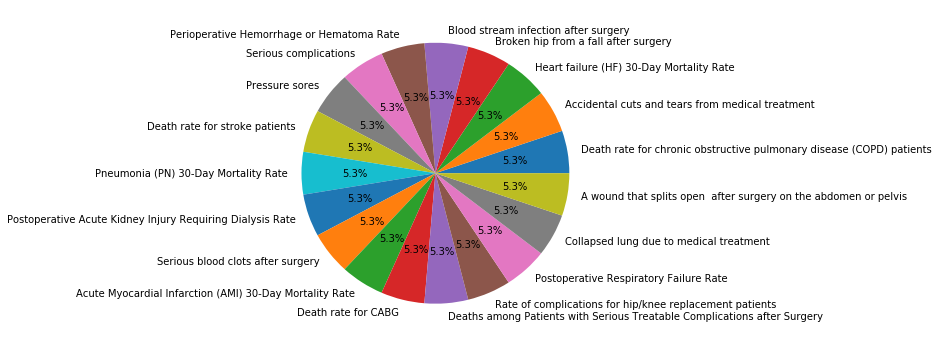

19
MORT_30_PN
   Provider ID                     Hospital Name Summary star rating  \
0        10001  SOUTHEAST ALABAMA MEDICAL CENTER                   3   

   ZIP Code    City State         Hospital Type  \
0     36301  DOTHAN    AL  Acute Care Hospitals   

                            Hospital Ownership Emergency Services  \
0  Government - Hospital District or Authority                Yes   

  Meets criteria for meaningful use of EHRs      ...       MORT_30_STK  \
0                                         Y      ...              16.1   

  PSI_14_POSTOP_DEHIS MORT_30_HF PSI_90_SAFETY PSI_15_ACC_LAC MORT_30_COPD  \
0                2.48       11.4          0.85           1.17          9.7   

  PSI_8_POST_HIP MORT_30_AMI PSI_4_SURG_COMP PSI_9_POST_HEM  
0           0.11        13.4          165.09           3.78  

[1 rows x 35 columns]


In [16]:
# Tables that I need to process and add 
# 2- Complications and Deaths- Hospital.csv  - There is a score and then there is a national comparison. look in the documents to see which one to use
# 3- Healthcare associated infections- Hospital.csv - Same comment as above
# 4- Hospital Returns - Hospital.csv
# 5- Medicare Hospital Spending by Claim.csv -> Look into the documentation to get a bette idea
# 6- Outpatient Imaging Efficiency- Hopital.csv
# 7- Structural Measures- Hospital.csv
# 8- Timely and Effective Care-Hospitals.csv -> Specially the median times
#Questions: now some of these might have been used to compute the national comparison in the hospital general file. How would this make a difference in the predictive modelling part?

# 2 - Load 'Hospital Complications and Deaths - Hospital.csv'
data_file3 = os.path.join(d, 'data','raw','Complications and Deaths - Hospital.csv')
#print(data_file2)
complications_df = pd.read_csv(data_file3, encoding = "ISO-8859-1")
#print(complications_df.info())

#Examine the Measure Name column
complications_df['Measure Name'].value_counts().plot.pie(figsize=(6, 6),autopct="%1.1f%%")
plt.ylabel('')
plt.show()

# For each measure, make a column and assign the hospital value to it 
print(len(complications_df['Measure Name'].value_counts()))

# Select the subset of the dataframe with measure=measure and scores
measures = complications_df['Measure ID'].value_counts().index
print(measures[0])
for measure in measures:
    tmp_df = complications_df[complications_df['Measure ID'] == measure]
    tmp_df = tmp_df[['Provider ID', 'Score']]
    tmp_df.rename(columns = {'Score':measure}, inplace=True)
    survey_df_clean = pd.merge(survey_df_clean, tmp_df, on = 'Provider ID')

print(survey_df_clean.head(1))



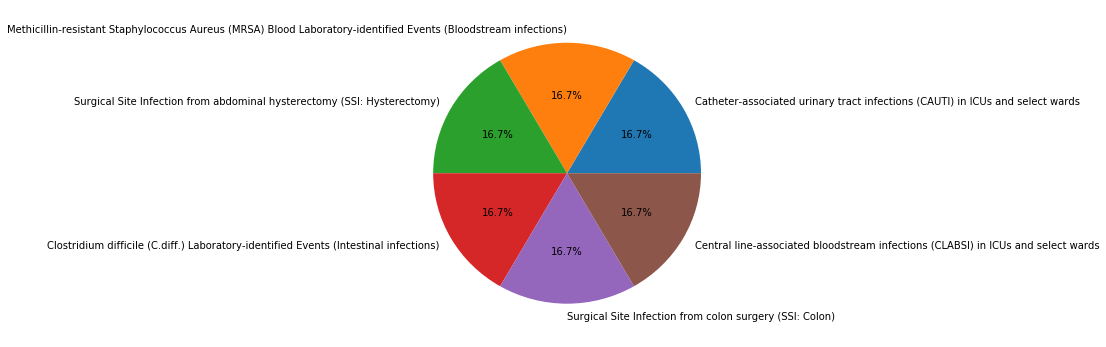

HAI_1_SIR
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3490 entries, 0 to 3489
Data columns (total 41 columns):
Provider ID                                             3490 non-null int64
Hospital Name                                           3490 non-null object
Summary star rating                                     3490 non-null object
ZIP Code                                                3490 non-null int64
City                                                    3490 non-null object
State                                                   3490 non-null object
Hospital Type                                           3490 non-null object
Hospital Ownership                                      3490 non-null object
Emergency Services                                      3490 non-null object
Meets criteria for meaningful use of EHRs               3464 non-null object
Mortality national comparison                           3490 non-null object
Safety of care national comparison    

In [17]:
# 3 - Load 'Healthcare Associated Infections - Hospital.csv'
data_file3 = os.path.join(d, 'data','raw','Healthcare Associated Infections - Hospital.csv')
#print(data_file2)
infections_df = pd.read_csv(data_file3, encoding = "ISO-8859-1")
#print(complications_df.info())

#Examine the Measure Name column
infections_df = infections_df[infections_df['Measure Name'].str.lower().str.contains('infection')]
infections_df['Measure Name'].value_counts().plot.pie(figsize=(6, 6),autopct="%1.1f%%")
plt.ylabel('')
plt.show()

# Select the subset of the dataframe with measure=measure and scores
# Here some of the 'Not Available' is due to 'cannot be calculated' some due to 'does not apply'
measures = infections_df['Measure ID'].value_counts().index
print(measures[0])
for measure in measures:
    tmp_df = infections_df[infections_df['Measure ID'] == measure]
    tmp_df = tmp_df[['Provider ID', 'Score']]
    tmp_df.rename(columns = {'Score':measure}, inplace=True)
    survey_df_clean = pd.merge(survey_df_clean, tmp_df, on = 'Provider ID')
    
print(survey_df_clean.info())

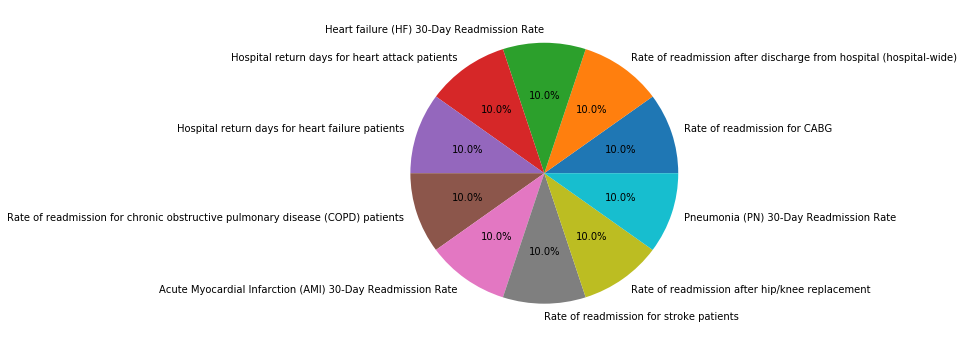

EDAC_30_AMI
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3490 entries, 0 to 3489
Data columns (total 51 columns):
Provider ID                                             3490 non-null int64
Hospital Name                                           3490 non-null object
Summary star rating                                     3490 non-null object
ZIP Code                                                3490 non-null int64
City                                                    3490 non-null object
State                                                   3490 non-null object
Hospital Type                                           3490 non-null object
Hospital Ownership                                      3490 non-null object
Emergency Services                                      3490 non-null object
Meets criteria for meaningful use of EHRs               3464 non-null object
Mortality national comparison                           3490 non-null object
Safety of care national comparison  

In [18]:
#4- Load 'Hospital Returns - Hospital.csv'
data_file4 = os.path.join(d, 'data','raw','Hospital Returns - Hospital.csv')
#print(data_file2)
returns_df = pd.read_csv(data_file4, encoding = "ISO-8859-1")
#print(complications_df.info())

#Examine the Measure Name column
returns_df['Measure Name'].value_counts().plot.pie(figsize=(6, 6),autopct="%1.1f%%")
plt.ylabel('')
plt.show()

# Select the subset of the dataframe with measure=measure and scores
# Here some of the 'Not Available' is due to 'not available' some due to 'data for inpatient/outpatient'
measures = returns_df['Measure ID'].value_counts().index
print(measures[0])
for measure in measures:
    tmp_df = returns_df[returns_df['Measure ID'] == measure]
    tmp_df = tmp_df[['Provider ID', 'Score']]
    tmp_df.rename(columns = {'Score':measure}, inplace=True)
    survey_df_clean = pd.merge(survey_df_clean, tmp_df, on = 'Provider ID')
    
print(survey_df_clean.info())

In [19]:
def add_measure(df, measure_response, survey_df_clean):
    """merge new meaures from df
    with survey_df_clean
    """
    #print(survey_df_clean.info())
    measures = df['Measure ID'].value_counts().index
    #print(measures)
    for measure in measures:
        tmp_df = df[df['Measure ID'] == measure]
        #print(len(tmp_df['Provider ID']))
            #print(len(tmp_df['Provider ID']))
        tmp_df = tmp_df[['Provider ID', measure_response]]
        tmp_df.rename(columns = {measure_response:measure}, inplace=True)
        # Perform a left outer join, to include all the hospitals even if they don't have the measure
        survey_df_clean = pd.merge(survey_df_clean, tmp_df, how='left', on = 'Provider ID')
    
    return survey_df_clean 


#5- Load 'Medicare Hospital Spending per Patient- Hospital.csv'
data_file5 = os.path.join(d, 'data','raw','Medicare Hospital Spending per Patient - Hospital.csv')
spending_df = pd.read_csv(data_file5, encoding = "ISO-8859-1")
#print(survey_df_clean.info())
survey_df_clean = add_measure(spending_df, 'Score', survey_df_clean)
print(survey_df_clean.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3490 entries, 0 to 3489
Data columns (total 52 columns):
Provider ID                                             3490 non-null int64
Hospital Name                                           3490 non-null object
Summary star rating                                     3490 non-null object
ZIP Code                                                3490 non-null int64
City                                                    3490 non-null object
State                                                   3490 non-null object
Hospital Type                                           3490 non-null object
Hospital Ownership                                      3490 non-null object
Emergency Services                                      3490 non-null object
Meets criteria for meaningful use of EHRs               3464 non-null object
Mortality national comparison                           3490 non-null object
Safety of care national comparison              

In [20]:
#6- Load 'Outpatient Imaging Efficiency - Hospital.csv'
data_file6 = os.path.join(d, 'data','raw','Outpatient Imaging Efficiency - Hospital.csv')
imaging_df = pd.read_csv(data_file6, encoding = "ISO-8859-1")
survey_df_clean = add_measure(imaging_df, 'Score', survey_df_clean)
#print(len(survey_df_clean['Provider ID']))
print(survey_df_clean.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3490 entries, 0 to 3489
Data columns (total 58 columns):
Provider ID                                             3490 non-null int64
Hospital Name                                           3490 non-null object
Summary star rating                                     3490 non-null object
ZIP Code                                                3490 non-null int64
City                                                    3490 non-null object
State                                                   3490 non-null object
Hospital Type                                           3490 non-null object
Hospital Ownership                                      3490 non-null object
Emergency Services                                      3490 non-null object
Meets criteria for meaningful use of EHRs               3464 non-null object
Mortality national comparison                           3490 non-null object
Safety of care national comparison              

In [21]:
#7- Load 'Structural Measures- Hospital.csv'
data_file7 = os.path.join(d, 'data','raw','Structural Measures - Hospital.csv')
structure_df = pd.read_csv(data_file7, encoding = "ISO-8859-1")
survey_df_clean = add_measure(structure_df, 'Measure Response', survey_df_clean)
print(survey_df_clean.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3490 entries, 0 to 3489
Data columns (total 65 columns):
Provider ID                                             3490 non-null int64
Hospital Name                                           3490 non-null object
Summary star rating                                     3490 non-null object
ZIP Code                                                3490 non-null int64
City                                                    3490 non-null object
State                                                   3490 non-null object
Hospital Type                                           3490 non-null object
Hospital Ownership                                      3490 non-null object
Emergency Services                                      3490 non-null object
Meets criteria for meaningful use of EHRs               3464 non-null object
Mortality national comparison                           3490 non-null object
Safety of care national comparison              

In [22]:
#8 Load 'Timely and Effective Care-Hospitals.csv'
data_file8 = os.path.join(d, 'data','raw','Timely and Effective Care - Hospital.csv')
timely_df = pd.read_csv(data_file8, encoding = "ISO-8859-1")
measure_names = ['Door to diagnostic eval','Median time to pain med','Left before being seen','Aspirin at Arrival','Median Time to ECG']
timely_df = timely_df[timely_df['Measure Name'].isin(measure_names)]
timely_df['Measure Name'].value_counts()
survey_df_clean = add_measure(timely_df, 'Score', survey_df_clean)
print(survey_df_clean.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3490 entries, 0 to 3489
Data columns (total 70 columns):
Provider ID                                             3490 non-null int64
Hospital Name                                           3490 non-null object
Summary star rating                                     3490 non-null object
ZIP Code                                                3490 non-null int64
City                                                    3490 non-null object
State                                                   3490 non-null object
Hospital Type                                           3490 non-null object
Hospital Ownership                                      3490 non-null object
Emergency Services                                      3490 non-null object
Meets criteria for meaningful use of EHRs               3464 non-null object
Mortality national comparison                           3490 non-null object
Safety of care national comparison              

In [23]:
#Remove ACS_Registry as it is only reported for 144 hospitals
survey_df_clean.drop('ACS_REGISTRY', axis=1, inplace=True)

# looking more closely at the distribution of each feature
survey_df_clean_less = survey_df_clean[survey_df_clean.columns[3:]]
for i,c in enumerate(survey_df_clean_less.columns):
    print('#######' + c + '##################')
    print(survey_df_clean_less[c].value_counts())

#######ZIP Code##################
70508    5
76104    4
75231    4
79902    4
75093    4
77030    4
40202    3
60612    3
67226    3
78539    3
96001    3
77479    3
55805    3
85206    3
77598    3
75701    3
17403    3
73120    3
48201    3
90033    3
39301    3
72205    3
74133    3
46032    3
11203    3
99508    3
93301    3
71201    3
71301    3
4401     2
        ..
44223    1
64701    1
36027    1
56501    1
46260    1
46312    1
46320    1
81201    1
79124    1
46706    1
54568    1
15065    1
85713    1
75042    1
48413    1
75034    1
56601    1
46360    1
44307    1
15601    1
91406    1
85255    1
49412    1
85251    1
75010    1
75006    1
56573    1
29944    1
95476    1
65536    1
Name: ZIP Code, Length: 3224, dtype: int64
#######City##################
CHICAGO                23
HOUSTON                18
LOS ANGELES            17
DALLAS                 16
COLUMBUS               14
PHOENIX                14
PHILADELPHIA           14
OKLAHOMA CITY          13
SPRINGFIELD   

In [29]:
# Replace 'Not Available' values with nan
survey_df_clean = survey_df_clean.replace(r'Not Available', np.nan, regex=True)

# Make sure that the numeric columns have numeric types
survey_df_clean = survey_df_clean.apply(pd.to_numeric, errors='ignore')

# Write to file
data_file_clean = os.path.join(d, 'data','interim','hospitals_clean.csv')
survey_df_clean.to_csv(data_file_clean, encoding='utf-8', index=False)
survey_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3490 entries, 0 to 3489
Data columns (total 69 columns):
Provider ID                                             3490 non-null int64
Hospital Name                                           3490 non-null object
Summary star rating                                     3490 non-null int64
ZIP Code                                                3490 non-null int64
City                                                    3490 non-null object
State                                                   3490 non-null object
Hospital Type                                           3490 non-null object
Hospital Ownership                                      3490 non-null object
Emergency Services                                      3490 non-null object
Meets criteria for meaningful use of EHRs               3464 non-null object
Mortality national comparison                           3110 non-null object
Safety of care national comparison               

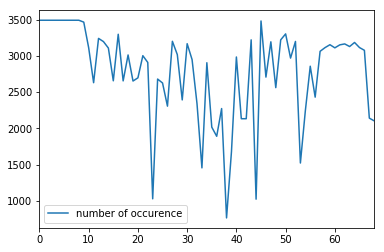

,column,number of occurence
0,Provider ID,3490
1,Hospital Name,3490
2,Summary star rating,3490
3,ZIP Code,3490
4,City,3490
5,State,3490
6,Hospital Type,3490
7,Hospital Ownership,3490
8,Emergency Services,3490
9,Meets criteria for meaningful use of EHRs,3464


In [28]:
# Make plot of the number of non Nan values for each column 
column_count_sr = survey_df_clean.count() 
column_count_df = pd.DataFrame({'column':column_count_sr.index, 'number of occurence':column_count_sr.values})
column_count_df.plot()
plt.show()
column_count_df
